In [1]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install yfinance
# !pip install requests
# !pip install selenium
# !pip install webdriver-manager

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import time
import pickle
import json
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
import requests
import sys
import traceback
from getpass import getpass
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup

# Get Data

## Solana

In [4]:
solana_df = yf.download("SOL-USD", start="2021-01-01", end=datetime.today().strftime('%Y-%m-%d'))
solana_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-31,1.535606,1.550610,1.430263,1.510898,1.510898,12763260
2021-01-01,1.509775,1.859656,1.502038,1.842084,1.842084,25722549
2021-01-02,1.845586,1.989295,1.721482,1.799275,1.799275,31671064
2021-01-03,1.799902,2.364981,1.799902,2.161752,2.161752,55073422
2021-01-04,2.162412,2.485097,1.876342,2.485097,2.485097,59955405
...,...,...,...,...,...,...
2022-05-31,47.181328,48.038990,44.840015,45.767841,45.767841,1509191627
2022-06-01,45.765129,45.946659,40.050350,40.269669,40.269669,1422647092
2022-06-02,40.255280,41.327866,38.360672,40.891346,40.891346,1554022054


<AxesSubplot:xlabel='Date'>

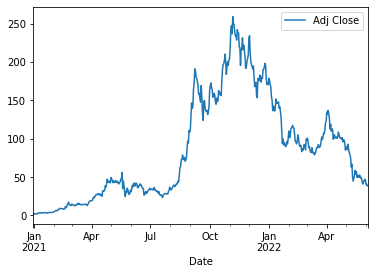

In [5]:
solana_df.plot(y = "Adj Close", use_index=True)

## Ethereum 

In [6]:
ethereum_df = yf.download("ETH-USD", start="2018-01-01", end=datetime.today().strftime('%Y-%m-%d'))
ethereum_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-31,712.211975,760.348022,710.119019,756.732971,756.732971,2554269952
2018-01-01,755.757019,782.530029,742.004028,772.640991,772.640991,2595760128
2018-01-02,772.346008,914.830017,772.346008,884.443970,884.443970,5783349760
2018-01-03,886.000000,974.471008,868.450989,962.719971,962.719971,5093159936
2018-01-04,961.713013,1045.079956,946.085999,980.921997,980.921997,6502859776
...,...,...,...,...,...,...
2022-05-31,1996.408081,2005.490967,1932.352051,1942.328003,1942.328003,18363115560
2022-06-01,1942.050659,1965.166626,1776.053223,1823.569336,1823.569336,21037797760
2022-06-02,1822.412109,1845.313965,1789.664185,1834.150513,1834.150513,17065041354


<AxesSubplot:xlabel='Date'>

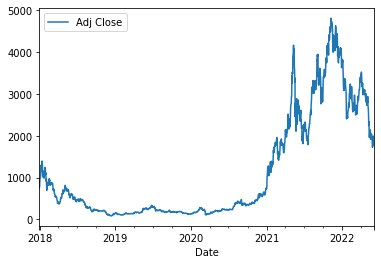

In [7]:
ethereum_df.plot(y = "Adj Close", use_index=True)

## Bitcoin

In [8]:
bitcoin_df = yf.download("BTC-USD", start="2018-01-01", end=datetime.today().strftime('%Y-%m-%d'))
bitcoin_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-31,12897.700195,14377.400391,12755.599609,14156.400391,14156.400391,12136299520
2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000
2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192
2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160
2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744
...,...,...,...,...,...,...
2022-05-31,31723.865234,32249.863281,31286.154297,31792.310547,31792.310547,33538210634
2022-06-01,31792.554688,31957.285156,29501.587891,29799.080078,29799.080078,41135817341
2022-06-02,29794.890625,30604.734375,29652.705078,30467.488281,30467.488281,29083562061


<AxesSubplot:xlabel='Date'>

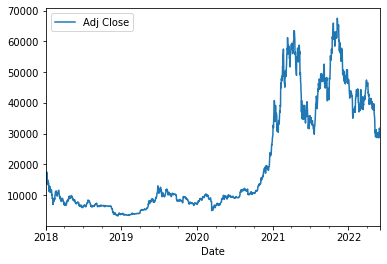

In [9]:
bitcoin_df.plot(y = "Adj Close", use_index=True)

In [10]:
bitcoin_df = bitcoin_df.reset_index()[['Date', 'Adj Close', 'Volume']]
bitcoin_df.rename(columns={"Date": "dates", "Adj Close" : "btc adj close", "Volume" : "btc volume"}, inplace = True)
bitcoin_df['dates'] = bitcoin_df['dates'].astype(str)

ethereum_df = ethereum_df.reset_index()[['Date', 'Adj Close', 'Volume']]
ethereum_df.rename(columns={"Date": "dates", "Adj Close" : "eth adj close", "Volume" : "eth volume"}, inplace = True)
ethereum_df['dates'] = ethereum_df['dates'].astype(str)

solana_df = solana_df.reset_index()[['Date', 'Adj Close', 'Volume']]
solana_df.rename(columns={"Date": "dates", "Adj Close" : "sol adj close", "Volume" : "sol volume"}, inplace = True)
solana_df['dates'] = solana_df['dates'].astype(str)

## Rarible

In [11]:
dict_collections = {}
list_broken_urls = []
url_top_100 = 'https://api-mainnet.rarible.com/marketplace/api/v4/collections/top?days=30&size=100'
url_collections = 'https://rarible-cdn.reallm.io/collections/{}/{}?filters=%7B%7D'
broken_collection_url = 'https://rarible.com/collection/{}/stats?range=-Number.MAX_SAFE_INTEGER'
list_features = ['marketcap', 'lowwatermark', 'transactions', 'owners', 'sellers', 'buyers']


def get_collections_id(url):
    json = requests.get(
        url
    ).json()

    df_id = pd.DataFrame.from_dict(json)
    df_id = df_id[['id', 'name']]
    return df_id


def change_collection_data(df, feature):
    if feature == 'prices':
        df.rename(columns = {'dates': 'dates'}, inplace = True)
    elif feature == 'marketcap':
        df.rename(columns = {'graph_dates': 'dates',
                            'graph_values': 'marketcap'}, inplace = True)
        df = df[['dates', 'marketcap']]
    elif feature == 'lowwatermark':
        df.rename(columns = {'graph_dates': 'dates',
                            'graph_values': 'lowwatermark'}, inplace = True)
        df = df[['dates', 'lowwatermark']]
    elif feature == 'transactions':
        df.rename(columns = {'graph_dates': 'dates',
                            'graph_values': 'amount_transactions'}, inplace = True)
        df = df[['dates', 'amount_transactions']]
    elif feature == 'owners':
        df.rename(columns = {'graph_dates': 'dates',
                            'graph_values': 'amount_owners'}, inplace = True)
        df = df[['dates', 'amount_owners']]
    elif feature == 'sellers':
        df.rename(columns = {'graph_dates': 'dates',
                            'graph_values': 'amount_sellers'}, inplace = True)
        df = df[['dates', 'amount_sellers']]
    elif feature == 'buyers':
        df.rename(columns = {'graph_dates': 'dates',
                            'graph_values': 'amount_buyers'}, inplace = True)
        df = df[['dates', 'amount_buyers']]
    
    return df


def get_collection_data(id, features):
    df = pd.read_json(url_collections.format(id, 'prices'))
    for feature in features:
        tmp = pd.read_json(url_collections.format(id, feature))
        df = df.merge(change_collection_data(tmp, feature), how='left', on='dates')
        
    return df


def add_stocks(df):
    df = df.merge(bitcoin_df, how='left', on='dates')
    df = df.merge(ethereum_df, how='left', on='dates')
    df = df.merge(solana_df, how='left', on='dates')
    
    return df


def replace_nan(df):
    for i in df.columns[df.isnull().any(axis=0)]:
        for index, value in df[i].items():
            if np.isnan(value):
                try:
                    df[i].at[index] = df[i].iloc[index-3: index].mean()
                except:
                    pass

    return df    


def work_with_stocks(df):
    df['change in btc'] = df['btc adj close'] - df['btc adj close'].shift()
    df['change in eth'] = df['eth adj close'] - df['eth adj close'].shift()
    df['change in sol'] = df['sol adj close'] - df['sol adj close'].shift()
    
    return df


df_id = get_collections_id(url_top_100)
for index, row in df_id.iterrows():
    try:
        tmp = get_collection_data(row['id'], list_features)
        tmp = replace_nan(tmp)
        tmp = add_stocks(tmp)
        tmp = work_with_stocks(tmp)
        dict_collections[row['name']] = tmp
        print("collection:", row['name'], "done")
    except:
        print("collection:", row['name'], "has not got dataset")
        print("url:", broken_collection_url.format(row['id']))
        list_broken_urls.append(broken_collection_url.format(row['id']))
        pass


collection: Otherdeed done
collection: Azuki done
collection: Bored Ape Yacht Club done
collection: projectPXN done
collection: goblintown done
collection: MutantApeYachtClub done
collection: BEANZ Official done
collection: CloneX done
collection: Moonbirds done
collection: Doodles done
collection: Art Blocks Factory done
collection: Chimpers done
collection: Boki done
collection: Ragnarok done
collection: Genesis done
collection: DEGEN TOONZ done
collection: Murakami.Flowers done
collection: AIMoonbirds done
collection: ENS domains has not got dataset
url: https://rarible.com/collection/0x57f1887a8bf19b14fc0df6fd9b2acc9af147ea85/stats?range=-Number.MAX_SAFE_INTEGER
collection: Rektguy done
collection: We Are All Going to Die done
collection: Mindblowon done
collection: Moonbirds Oddities done
collection: adidas Originals: Into the Metaverse done
collection: Akumu Dragonz done
collection: BoredApeKennelClub done
collection: Bored Ape Chemistry Club done
collection: Meebits done
collect

In [12]:
with open('dataset.pkl', 'wb') as f:
    pickle.dump(dict_collections, f)

In [13]:
dict_collections['MutantApeYachtClub']

,dates,prices_avg,prices_floor,prices_median,volume,marketcap,lowwatermark,amount_transactions,amount_owners,amount_sellers,amount_buyers,btc adj close,btc volume,eth adj close,eth volume,sol adj close,sol volume,change in btc,change in eth,change in sol
0,2021-08-29,30573.945494,0.000000,25978.451172,1.706332e+08,9.277673e+03,21245.703,5581,7080.0,5.0,37.000000,48829.832031,25889650240,3227.002686,13296586731,94.469673,1830344091,NaN,NaN,NaN
1,2021-08-30,42150.432895,0.000000,32023.800781,4.611257e+07,3.916317e+06,20522.010,1094,7503.0,2.0,46.000000,47054.984375,31847007016,3224.374268,19306924485,110.544807,5274104165,-1774.847656,-2.628418,16.075134
2,2021-08-31,34728.502238,0.000000,28324.003906,1.972579e+07,7.019255e+06,20522.010,568,7693.0,3.0,24.000000,47166.687500,34730363427,3433.732666,27280502987,108.483772,7590894022,111.703125,209.358398,-2.061035
3,2021-09-01,34049.167712,1848.198730,24513.210938,1.637765e+07,2.655862e+07,20522.010,481,7793.0,6.0,42.000000,48847.027344,39139399125,3834.828125,30070890104,111.033005,3974443896,1680.339844,401.095459,2.549232
4,2021-09-02,26299.774417,12414.097656,22857.037109,1.041471e+07,1.794458e+08,20522.010,396,7933.0,9.0,21.000000,49327.722656,39508070319,3790.989990,24387397330,128.102386,5074399603,480.695312,-43.838135,17.069382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,2022-05-31,36047.630534,32997.417969,35033.783203,4.325716e+05,6.114422e+08,24113.527,12,13977.0,95.0,1.004607,31792.310547,33538210634,1942.328003,18363115560,45.767841,1509191627,65.919922,-54.113281,-1.411602
271,2022-06-01,35409.877679,1502.993530,36038.021484,6.373778e+05,2.785047e+07,24113.527,18,13989.0,115.0,1.004510,29799.080078,41135817341,1823.569336,21037797760,40.269669,1422647092,-1993.230469,-118.758667,-5.498173
272,2022-06-02,36952.222982,32039.212891,38231.232422,2.217133e+05,5.936866e+08,24113.527,6,14007.0,109.0,1.004738,30467.488281,29083562061,1834.150513,17065041354,40.891346,1554022054,668.408203,10.581177,0.621677
273,2022-06-03,34230.632292,25650.902344,34179.273438,5.134595e+05,4.753112e+08,24113.527,15,14017.0,57.0,1.004618,29704.390625,26175547452,1775.078613,14878001811,38.259220,1348656102,-763.097656,-59.071899,-2.632126
